In [ ]:
#!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 7.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.datasets import load_wine
#a=load_wine()
#a.keys() #dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
#print(a['DESCR'])
X, y = load_wine(return_X_y=True, as_frame=True)

In [ ]:
load_wine? # esto es para ver la ayuda 

In [ ]:
X.head()
#alcohol= el grado de alcohol

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X.shape # tengo 178 vinos con 13 features

(178, 13)

In [ ]:
y.shape # me entrega la clase del vino. Hay 3 clases de vino

(178,)

## Arranquemos por el decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTreeClassifier?
# criterion es gini o entropy. Las dos son muy parecidas a information gain (la que vimos en clase). 
#El criterion es la funcion para medir la calidad de un split.

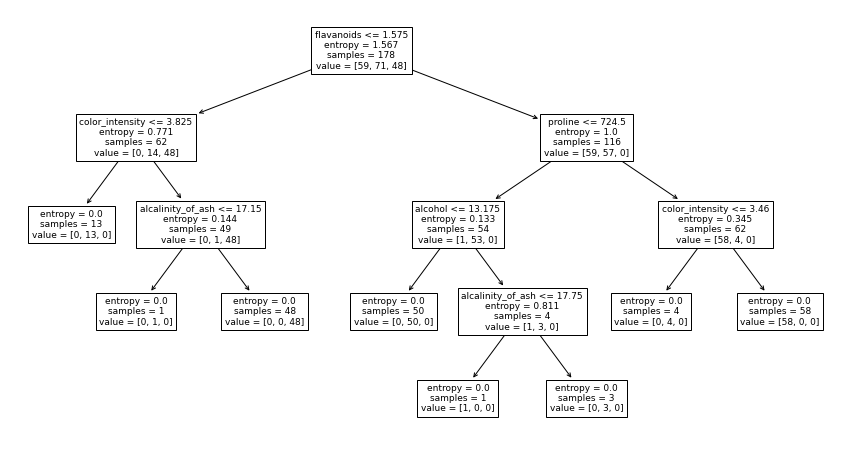

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy') 
dt.fit(X, y)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns);

Aca podemos ver como armo el arbol de decision. El arbol se arma automaticamente, no hay una parte manual. El modelo de arbol se ajusto, despues podemos evaluar el modelo. Primero usa la feature flavanoids<=1.575. Tengo 178 ejemplos que son todos los del dataset. Y ahi lo parte. En una de las ramas, elimino todos los de la clase 1 ([0,14,48]). Si flavinoids <=1.575, elimino la clase 1. Y si es mayor, entonces no es de la clase 3 ([59,57,0]). En una rama me quedaron 62 y en la otra 116 ejemplos. Sigo bajando. Si color intensity en menor que 3.46 dice que es la clase 2 en funcion de 4 ejemplos. Esto es muy malo estadisticamente. Esta decision puede ser ruido. 

No confia en las decisiones que se toman con 4 ejemplos del data set. La clase que viene vemos si eso es ruido o senial. Es decir si estoy ajustando ruido o senial. Vamos a ver si el modelo ahi esta overfitteando. 

Aca no parti el dataset en train y validation. Eso lo vamos a discutir despues. 

In [ ]:
X.iloc[0] # asi puedo ver todos los valores para el primer elemento de mi data frame

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64

In [ ]:
dt.predict([X.iloc[0]])

array([0])

In [ ]:
y.iloc[0]

0

In [ ]:
preds=dt.predict(X)
(y == preds).sum() # le pega en todos 

178

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1) 
dt.fit(X, y)
preds=dt.predict(X)
(y == preds).sum() # le pega en todos 

107

In [ ]:
#(y == preds).tolist().index()
(y == preds).tolist().index(False) # el primer indice donde no le pega

59

In [ ]:
print(preds[59]) # el modelo predijo clase 2
print(y.iloc[59]) # es la clase 1 
# es un falso positivo para la clase 2
# es un falso negativo para la clase 1

2
1


In [ ]:
#f1 va entre 0 y 1
#f1_score(y,dt.predict(X), average='micro') # el average es necesario cuando tengo mas de 2 clases
f1_score(y,dt.predict(X), average='weighted')

0.45884138333576535

In [ ]:
precision_score(y,dt.predict(X), average='micro') 

0.601123595505618

In [ ]:
recall_score(y,dt.predict(X), average='micro') 

0.601123595505618

Cuando hay mas de dos clases no se cumple la definicion tipica de f1 como sumas y divisiones de precision y recall. Eso es por el metodo que se usa para el average 

Para lo que sigue convertimos el problema en dos clases. Las metricas que vamos a ver estan definidas bien para una clasificacion binaria. Cuando tengo mas de 2 clases lo que se suele hacer es calcular precision y recall asumiendo que hay dos clases. Por ejemplo, clase 1 y clase no 1 (clases 2 y 3). Y asi con todas (clase 2 y clase no 2, clase 3 y clase no 3) y despues entrego el promedio de los resultados. 

In [ ]:
# Convertimos el problema a clasificacion binaria
# Para mentimos un poquito y cambiamos todas las clases "2" por clases "0"

y[y == 2] = 0

In [ ]:
# Juga con max_depth!
#dt = DecisionTreeClassifier(criterion='entropy') 
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

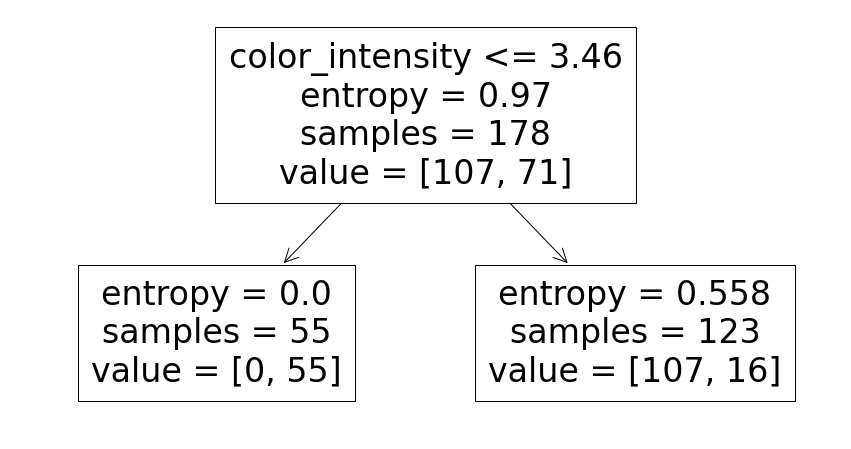

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns);

## Miremos algunas metricas

Aprovechemos para jugar y ver como cambiar el max_depth mas arriba impacta en las metricas

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score
#f1_score?

In [ ]:
preds = dt.predict(X)

preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
f1_score(y, dt.predict(X))

0.873015873015873

In [ ]:
prec = precision_score(y, dt.predict(X))
prec

1.0

In [ ]:
rec = recall_score(y, dt.predict(X))
rec

0.7746478873239436

Si el precision da 1, el recall no puede dar 1, y ademas el recall tiene que ser menor al f1_Score si el precision es 1. 

In [ ]:
# Solo para ver, efectivamente f1 es la ecuacion que vimos en clase?

2 * prec * rec / (prec + rec)

0.873015873015873

In [ ]:
y_score = dt.predict_proba(X)[:, 1] # primer columna es la probabilidad de que sea la clase 1, segunda columna es la probabilidad de que sea clase 2. Las dos suman 1.
# me quedo con la probabilidad de que sea de la clase 1
fpr, tpr, thresholds = roc_curve(y, y_score)
# Para armar la curva roc no quiero que el modelo me clasifique en clase 1 o 2. Necesito que me de la probabilidad de que sea 1 o que sea 2. Con eso me puedo armar la curva roc

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


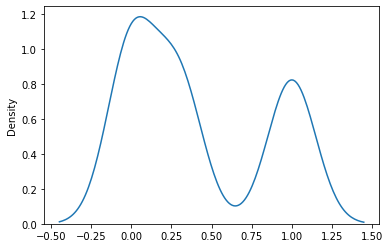

In [ ]:
import seaborn as sns 
sns.distplot(y_score, hist=False)

In [ ]:
# El decision tree tiene pocos scores (tantos scores como hojas)
# Podes ver que los scores se pueden calcular a partir del vector que dice "values" en la visualizacion mas arriba

set(y_score)

{0.0, 0.2962962962962963, 1.0}

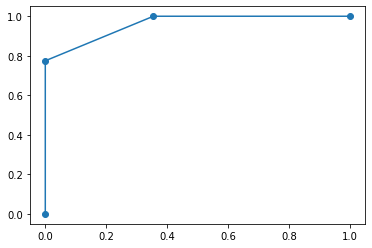

In [ ]:
# Miramos la curva ROC

plt.plot(fpr, tpr, '-o')
#fpr= false positive rate
# tpr= true positive rate 

In [ ]:
thresholds
# con max_depth=1 el 0.13=16/(16+107) y el 2 es para decir mas de 1 

array([2.       , 1.       , 0.1300813])

In [ ]:
roc_auc_score(y, y_score)
# el area bajo la curva roc es cuanto es la probabilidad de ordenar bien 2 ejemplos al azar. 
# y_ejemplo_1=1 (positivo)
# y_ejemplo_2=0 (negativo)
# Entonces cual es la probabilidad que el score del 
# positivo sea mayor al score del negativo si elijo dos
# de ese tipo de ejemplos al azar. Eso es el area bajo la curva roc


0.8873239436619718

👆 cual es la probabilidad de ordenar bien 2 ejemplos al azar

score(ejemplo1) > score(ejemplo2) 

y_1 = 1, y_2 = 0

Ver http://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html

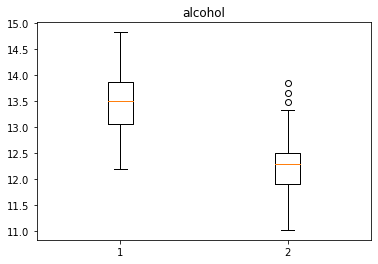

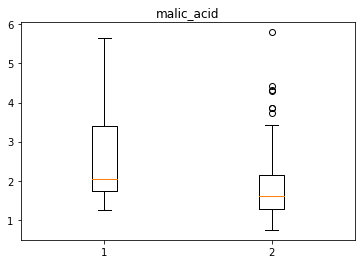

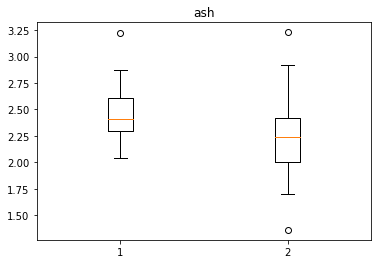

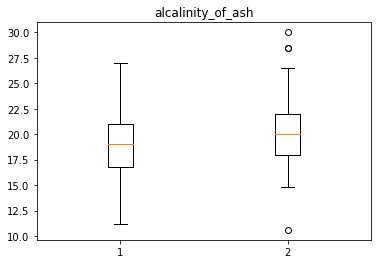

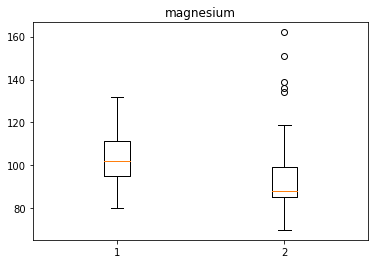

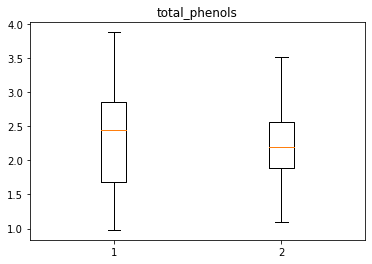

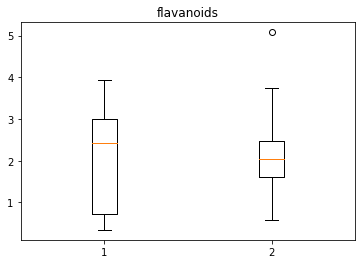

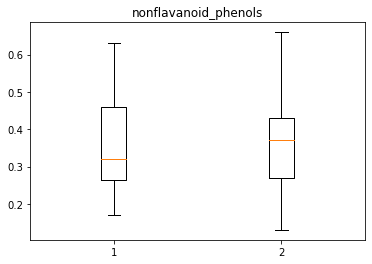

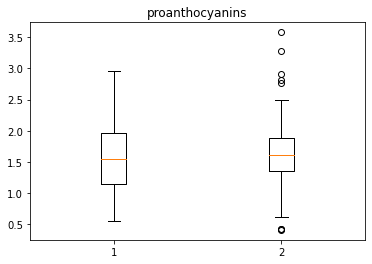

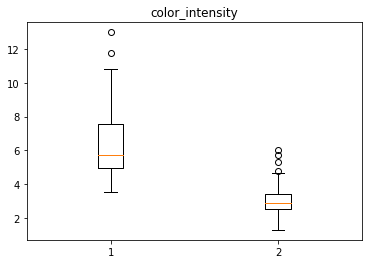

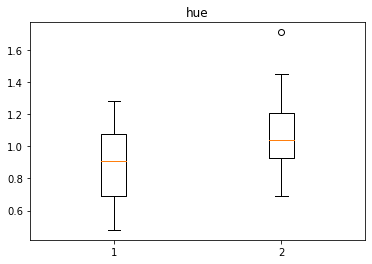

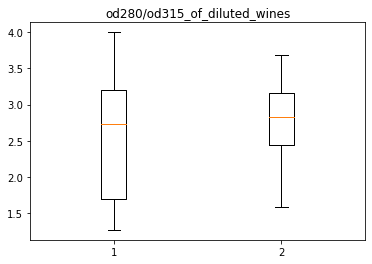

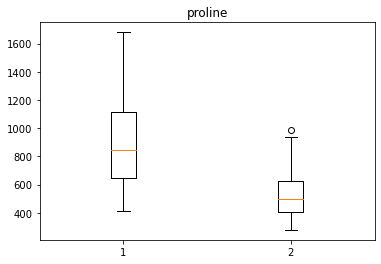

In [ ]:
# Vemos como se ven las distribuciones de las features en cada clase
# Con esto podemos darnos una idea de por qué el decision tree prioriza una por sobre la otra

for col in X.columns:
    col_vals = []
    for y_val in [0, 1]:
        col_vals.append(X[col][y == y_val])

    plt.figure()
    plt.title(col)
    plt.boxplot(col_vals)
   #color intesity discrimina un monton. Tiene sentido que este arriba de todo en el arbol. 
   #Ahora tiene algunos outliers. Se color intensity y casi me separa una clase entera. 
   #alcohol no separa tanto, los boxplots se intersecan mas.no redujo tanto la entropia. no gano tanta informacion. 
   # lo que hace el decision tree es hacer estos boxplots y calcular la 
   #reduccion de la entropia para saber si pongo un corte cuanta informacion me deja ese corte sobre la problematica que quiero resolver. 

# Regresion logística

In [ ]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression?
lr = LogisticRegression()
lr.fit(X, y); 
# el warning dice que no convirgio. No le damos bola.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
preds = lr.predict(X)

In [ ]:
f1_score(y, preds)

0.9436619718309859

In [ ]:
prec = precision_score(y, preds)
prec

0.9436619718309859

In [ ]:
rec = recall_score(y, preds)
rec

0.9436619718309859

In [ ]:
2 * prec * rec / (prec + rec)

0.9436619718309859

In [ ]:
import seaborn as sns

y_score = lr.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)
sns.distplot(y_score, hist=False)

In [ ]:
set(y_score) # el conjunto de todos los valores diferentes de probabilidad que predice
# esto predice valores numericos diferentes, 
# la regresion logistica devuelve la sigmoide de (b_0+b_1X_1+b_2x_2) donde los x_1 y x_2 son los features que son numeros

{4.655634438919507e-09,
 5.873725379348219e-08,
 1.1806121656056025e-07,
 3.3084121375443443e-07,
 5.750703720077419e-07,
 7.439951063232232e-07,
 7.746706750103155e-07,
 8.500385038726341e-07,
 8.502000380269449e-07,
 9.184141069508631e-07,
 1.9571529693917693e-06,
 2.2722290763739914e-06,
 2.4287997828549804e-06,
 2.562584818642192e-06,
 5.085865702303236e-06,
 6.824873548422825e-06,
 6.860691251327052e-06,
 7.5241857659123144e-06,
 7.961843008042822e-06,
 1.2347144833349507e-05,
 1.93924198153303e-05,
 2.4155533340166652e-05,
 2.4988395854740655e-05,
 2.8094198154685832e-05,
 3.000432305785007e-05,
 3.067417954502137e-05,
 4.545903218012774e-05,
 4.577209178230179e-05,
 5.0096121458178926e-05,
 5.181461303057614e-05,
 5.190200241234675e-05,
 5.195096823684829e-05,
 0.00010225605911080243,
 0.00010707375940383632,
 0.00011315564381753734,
 0.00011788557704766168,
 0.00013061068795675393,
 0.00015162082212724707,
 0.00016219456770981086,
 0.00018492222436865266,
 0.0002204855427164719

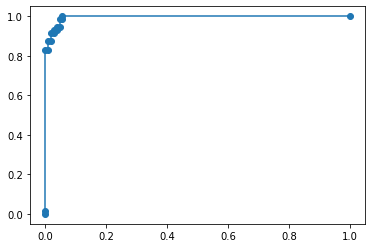

In [ ]:
plt.plot(fpr, tpr, '-o')

In [ ]:
roc_auc_score(y, y_score)  # va entre 0 y 1 
# estoy evaluando sobre los mismos datos que entrene 
# nunca voy a tener este valor tan bueno

0.9951296564433328

La curva ROC del arbol es mas cuadrada y eso es porque esta atada a como calcula las cosas (esto cuando esta lobotimizado, max_Depth=1 por ej). Si pongo max_depth=2 tengo 3 valores de scores en el arbol (tengo 0.29=16/(38+16) que es la probabilidad de pertenencia de la clase 2.) .